In [1]:
import os
import importlib
import numpy as np
import h5py
from myutils import plot_tool

import discretize
from discretize import TensorMesh
from SimPEG import (
    maps
)
np.random.seed(0)

In [2]:
mesh_name = "mesh_joint_Hannah_exfine"
folder_name = "mesh_joint_Hannah_exfine_071725_035930"

In [3]:
# NEED TO MODIFY: need to input save plot folder name to Plottool instead of a fixed route
mkdir_list = ["./temp_inv_out/" + folder_name + "/saved_figures/",
              "./temp_inv_out/" + folder_name + "/saved_figures/x/",
              "./temp_inv_out/" + folder_name + "/saved_figures/y/",
              "./temp_inv_out/" + folder_name + "/saved_figures/z/",
              "./temp_inv_out/" + folder_name + "/saved_figures/z_sep/",
              "./temp_inv_out/" + folder_name + "/saved_figures/y_contour/",
              "./temp_inv_out/" + folder_name + "/saved_figures/z_contour/"
              ]

In [4]:
for dirs in mkdir_list:
    if os.path.exists(dirs):
        print("{0:s} already exists! Skip creating this directory.".format(dirs))
    else:
        os.mkdir(dirs)
        print("Directory {0:s} created.".format(dirs))

./temp_inv_out/mesh_joint_Hannah_exfine_071725_035930/saved_figures/ already exists! Skip creating this directory.
./temp_inv_out/mesh_joint_Hannah_exfine_071725_035930/saved_figures/x/ already exists! Skip creating this directory.
./temp_inv_out/mesh_joint_Hannah_exfine_071725_035930/saved_figures/y/ already exists! Skip creating this directory.
./temp_inv_out/mesh_joint_Hannah_exfine_071725_035930/saved_figures/z/ already exists! Skip creating this directory.
./temp_inv_out/mesh_joint_Hannah_exfine_071725_035930/saved_figures/z_sep/ already exists! Skip creating this directory.
./temp_inv_out/mesh_joint_Hannah_exfine_071725_035930/saved_figures/y_contour/ already exists! Skip creating this directory.
./temp_inv_out/mesh_joint_Hannah_exfine_071725_035930/saved_figures/z_contour/ already exists! Skip creating this directory.


In [5]:
# Read mesh and parameters for plotting
mesh = TensorMesh._readUBC_3DMesh("./mesh/" + mesh_name + ".txt")
mesh_rm = TensorMesh._readUBC_3DMesh("./mesh/" + mesh_name + "_rm.txt")

with h5py.File("./temp_inv_out/" + folder_name + "/saved_model/paras.h5", "r") as h5f:
    xpad = h5f.attrs["xpad"]
    ypad = h5f.attrs["ypad"]
    magDSrate = h5f.attrs["magDSrate"]
    std_grv = h5f.attrs["std_grv"]
    std_mag = h5f.attrs["std_mag"]
    select_region = h5f["core_zone"][:]

In [6]:
# Observed data, topography, and active cells
data_grv_ori = np.load("./temp_inv_out/" + folder_name + "/saved_data/data_grv_ori.npy")
data_mag_ori = np.load("./temp_inv_out/" + folder_name + "/saved_data/data_mag_ori.npy")
topo_xyz = np.load("./temp_inv_out/" + folder_name + "/saved_data/topo_xyz.npy")
ind_active = np.load("./temp_inv_out/" + folder_name + "/saved_data/ind_active.npy")
# Jointly inverted models and data
recovered_model = np.load("./temp_inv_out/" + folder_name + "/saved_model/recovered_model.npy")
inv_prob_dpred = np.load("./temp_inv_out/" + folder_name + "/saved_model/inv_prob.npy")

In [7]:
dobs_grv = data_grv_ori[:, 3]
dpred_grv = -inv_prob_dpred[:data_grv_ori.shape[0]]  # CAUTION: The +z direction in SimPEG points upwards.
stations_grv = data_grv_ori[:,0:2]

dobs_mag = data_mag_ori[::magDSrate, 3]
dpred_mag = inv_prob_dpred[data_grv_ori.shape[0]:]
stations_mag = data_mag_ori[::magDSrate,0:2]

In [8]:
nC = int(ind_active.sum())
model_map = maps.IdentityMap(nP=nC)  # model consists of a value for each active cell
# Create Wires Map that maps from stacked models to individual model components
wires = maps.Wires(("density", nC), ("susceptibility", nC))
m_dens_joint, m_susc_joint = wires * recovered_model

In [9]:
# If inverted models without padding have been saved
model_dens_rm_f = discretize.TensorMesh.read_model_UBC(mesh_rm, file_name="./temp_inv_out/" + folder_name + "/saved_model/joint_dens_model_rm_UBC.txt")
model_susc_rm_f = discretize.TensorMesh.read_model_UBC(mesh_rm, file_name="./temp_inv_out/" + folder_name + "/saved_model/joint_susc_model_rm_UBC.txt")

In [10]:
importlib.reload(plot_tool)

<module 'myutils.plot_tool' from '/data/Shell_hydro/natural_hydrogen/myutils/plot_tool.py'>

In [11]:
meshinfo_dic = {'xpad': xpad,
                'ypad': ypad,
                'select_region': select_region
                }

In [12]:
# Initialize plotting tools
Plot_tool = plot_tool.Plot_tool(mesh, mesh_rm, meshinfo_dic, m_dens_joint, m_susc_joint, ind_active)

In [13]:
# Plot isostatic gravity anomaly data
# Saved in ./temp_inv_out/<folder_name>/saved_figures/
Plot_tool.plot_grv_map(folder_name, data_grv_ori)

In [14]:
# Plot total field magnetic anomaly data
# Saved in ./temp_inv_out/<folder_name>/saved_figures/
Plot_tool.plot_mag_map(folder_name, data_mag_ori)

In [15]:
# Plot topography data
# Saved in ./temp_inv_out/<folder_name>/saved_figures/
Plot_tool.plot_topo_map(folder_name, topo_xyz)

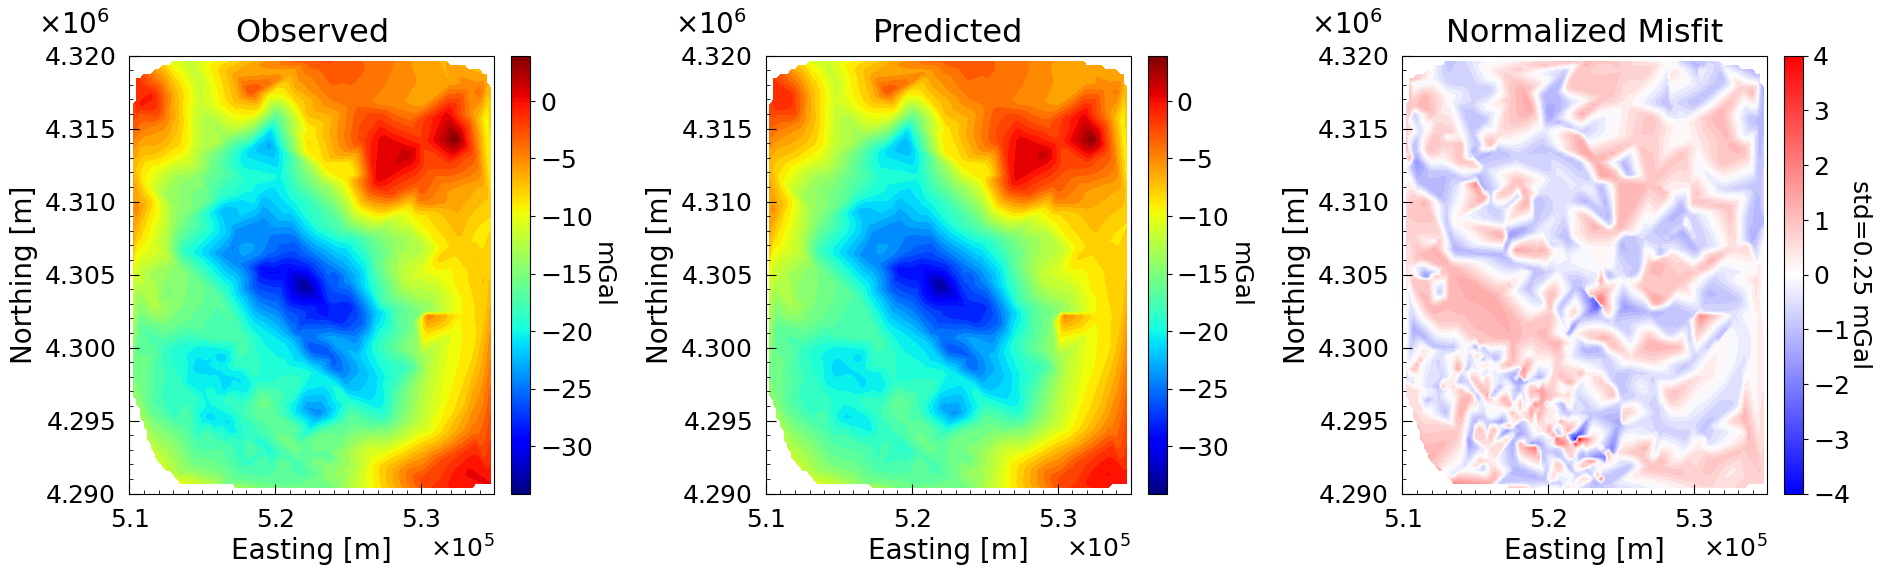

In [16]:
# Plot observed/predicted/misfit for gravity data
# Saved in ./temp_inv_out/<folder_name>/saved_figures/
Plot_tool.plot_grv_compare(folder_name, stations_grv, dobs_grv, dpred_grv, std_grv)

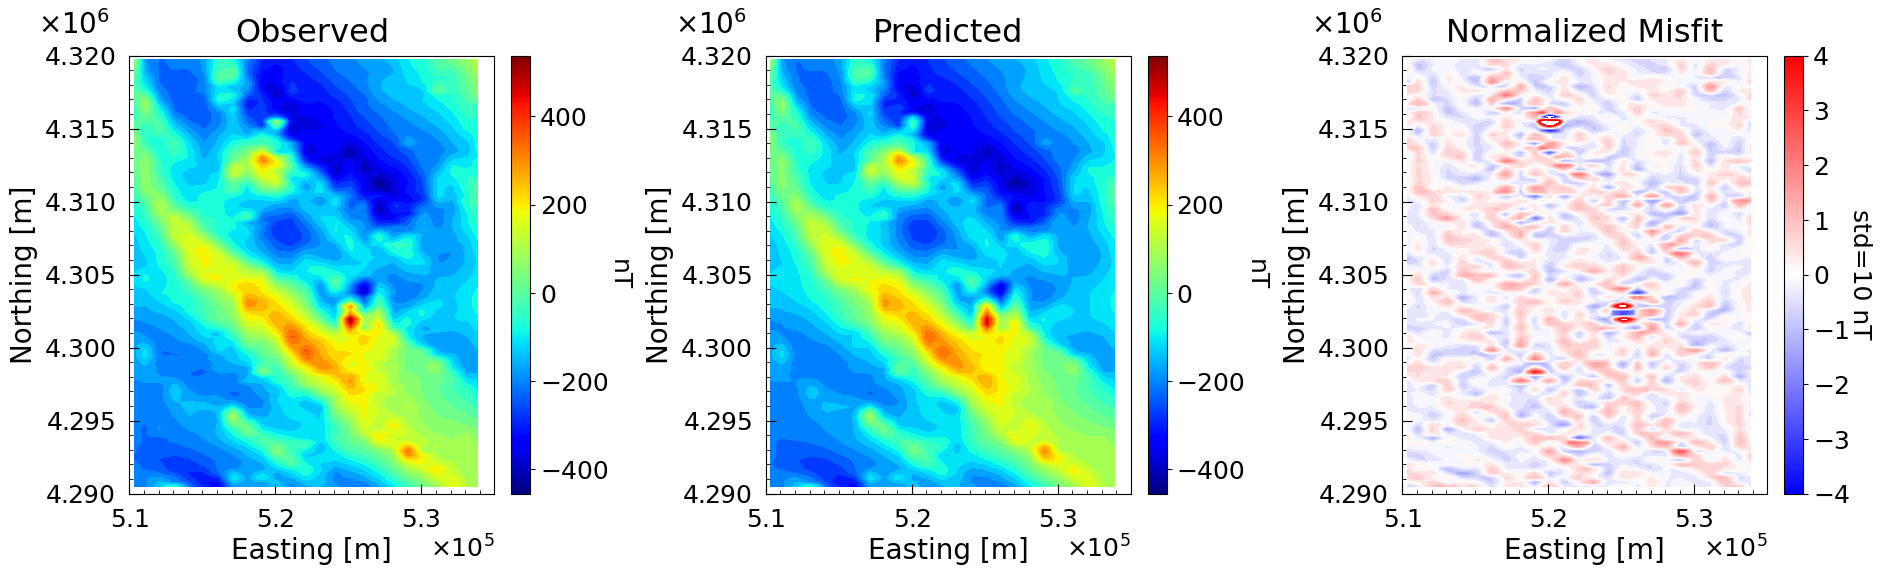

In [17]:
# Plot observed/predicted/misfit for magnetic data
# Saved in ./temp_inv_out/<folder_name>/saved_figures/
Plot_tool.plot_mag_compare(folder_name, stations_mag, dobs_mag, dpred_mag, std_mag)

In [19]:
# Plot depth slices for recovered models
# Saved in ./temp_inv_out/<folder_name>/saved_figures/z
Plot_tool.plot_depth_slices(folder_name)

In [20]:
# Plot vertical slices for recovered models along northing direction at each easting grid
# Saved in ./temp_inv_out/<folder_name>/saved_figures/x
Plot_tool.plot_easting_slices(folder_name)

In [21]:
# Plot vertical slices for recovered models along easting direction at each northing grid
# Saved in ./temp_inv_out/<folder_name>/saved_figures/y
Plot_tool.plot_northing_slices(folder_name)

In [22]:
# Preprocess geology differentiation results
Plot_tool.prep_GD_result(model_dens_rm_f, model_susc_rm_f)

In [24]:
# Plot a depth slice for the quasi-geology model with contours outline a chosen quasi-geology model unit (at chosen depth)
# Saved in ./temp_inv_out/<folder_name>/saved_figures/z_contour
Plot_tool.plot_qusi_depth_slices(folder_name, -2000, 10, Mts_flag=True, PPs_flag=False, Ws_flag=False, gtWs_flag=True)

In [23]:
# Plot a depth slice for the recovered models with contours outline a chosen quasi-geology model unit (at chosen depth)
# Saved in ./temp_inv_out/<folder_name>/saved_figures/z_contour
Plot_tool.plot_contour_depth_slices(folder_name, -2000, 10, den_clim=(-0.3, 0.3), sus_clim=(-0.05, 0.05), Mts_flag=True, PPs_flag=False, Ws_flag=False, gtWs_flag=True)

In [25]:
# Plot a vertical slice (along easting direction) for the quasi-geology model with contours outline a chosen quasi-geology model unit (at chosen northing grid)
# Saved in ./temp_inv_out/<folder_name>/saved_figures/y_contour
Plot_tool.plot_qusi_northing_slices(folder_name, 4300000, 10)

In [26]:
# Plot a vertical slice (along easting direction) for the recovered models with contours outline a chosen quasi-geology model unit (at chosen northing grid)
# Saved in ./temp_inv_out/<folder_name>/saved_figures/y_contour
Plot_tool.plot_contour_northing_slices(folder_name, 4300000, 10)